In [1]:
# Data Analysis for income classfier problem
#importing all important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#to deal with performance measures
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#importing Data

data_income = pd.read_csv(r'C:\Users\Administrator\Desktop\Python Test Data\NPTEL\income(1).csv')

In [4]:
#creating copy for further use
data = data_income.copy()

In [5]:
# Exploratory Data Analysis
#1. Getting to know the data
#2. Data preprocessing(dealing with missing values)
#3. Crosstabs and data visualisation





In [6]:
#Getting to know the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [7]:
#check for missing values

data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [8]:
#summary of our numerical variables using descriptive stats
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [10]:
#summary of our categorical variables 
data.describe(include ='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [12]:
#frequency of the two more critical variables
data['JobType'].value_counts()
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
#understanding what unique classes are present
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [14]:
#we see that there are blank spaces in front of each class, which is making it a special case

In [15]:
print(np.unique(data['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [16]:
#out of all these,' ?' really stands out, which Python does for missing values as NaN, hence we go back and read data again
#taking care of these

data = pd.read_csv(r'C:\Users\Administrator\Desktop\Python Test Data\NPTEL\income(1).csv', na_values = [' ?'])

In [17]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [18]:
#we observe now the missing values present here, which now have been converted to NaN and hence represented.
#Data preprocessing

In [19]:
#we will now subset the rows containing missing values

missing = data[data.isnull().any(axis=1)]

In [20]:
missing.shape

(1816, 13)

In [21]:
#we will now only consider cases where all information is completely fed and not partially
data2 = data.dropna(axis=0)

In [24]:

data2.shape

(30162, 13)

In [25]:
# difference in shape between data, missing, data2 equally equate each other, signifying that all missing values have been 
#removed or cases where incomplete rows are present are removed

In [26]:
#checking for correlation between indepedent variables
correlation = data2.corr()

In [27]:
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [28]:
#since we observe none of the variable exhibit correlation nearer to 1, and are closer to 0, signifies none are really more
#correlated or poor correlation

In [29]:
#extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [32]:
#getting gender proportion using crosstab
gender = pd.crosstab(index = data2['gender'], columns = 'count', normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [43]:
#gender vs salary status 
gender_salstat = pd.crosstab( index = data2['gender'], columns = data2['SalStat'],
                           normalize = 'index',
                            margins = True)


In [44]:
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


In [48]:
#by putting normalize = index, we get row proportion equal to 1
#putting margins = True we get All tab

In [49]:
gender_salstat = pd.crosstab( index = data2['gender'], columns = data2['SalStat'],
                           normalize = True
                            )

print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.036868                       0.287448
 Male                0.212055                       0.463630


In [50]:
#putting normalize = True instead of index, provides column wise proportion

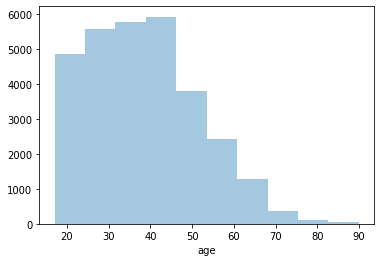

In [53]:
#getting to know more about the people participating in this
sns.distplot(data2['age'], bins = 10, kde= False)

In [54]:
#people within age group of 20-45 are higher in frequency

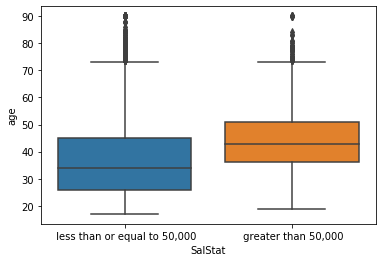

In [55]:
#doing a bivariate analysis using boxplots
sns.boxplot('SalStat', 'age', data = data2)

In [56]:
#people within 25-45 years of age tend to earn =<50000 and people within 35-50 years of age tend to earn => 50000

In [58]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

In [59]:
#that gives a numerical result how the age and SalStat variable are